In [52]:
import sys

import random
import tensorflow.keras
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import sklearn as sk
import tensorflow as tf
import platform
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import glob
import cv2
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization
from tensorflow.python.ops.numpy_ops import np_config

np_config.enable_numpy_behavior()

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-3.10.0-1160.80.1.el7.x86_64-x86_64-with-glibc2.17
Tensor Flow Version: 2.7.0
Keras Version: 2.7.0

Python 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:25:59) 
[GCC 10.3.0]
Pandas 1.4.2
Scikit-Learn 0.24.2
GPU is available


In [2]:
img_dir = "data/val_256/*"

files = glob.glob(img_dir)

In [3]:
y_data = []
x_data = []

for i in files:
    img = cv2.imread(i)
    y_data.append(img)
    cropped_img = img[64:192, 64:192]
    temp_img = np.zeros((256,256,3),dtype = int)
    for i in range(3):
        temp_img[:,:,i] = np.pad(cropped_img[:,:,i],((64,64),(64,64)),'constant', constant_values = (100))
    x_data.append(temp_img)
        

In [10]:
x_data = []
y_data = []
for i in files:
    img = cv2.imread(i)
    y_data.append(img)
    cropped_img = img[64:192, 64:192]
    temp_img = np.zeros((256,256,3),dtype = int)
    for i in range(3):
        temp_img[:,:,i] = np.pad(cropped_img[:,:,i],((64,64),(64,64)),'constant', constant_values = (100))
    x_data.append(temp_img)
    if(len(x_data) == 7164):
      break

In [4]:
len(x_data), len(y_data)

(7164, 7164)

In [5]:
x_data[0].shape

(256, 256, 3)

In [16]:
# Making Batches
train_dataset = []
for i in range(200): 
    temp = []
    for j in range(100):
        temp.append(np.reshape((x_data[(i * 100) + j]), (3, 256, 256)) / 128 - 1)
        if((j+1)%25 == 0):
            print("=", end="")
    train_dataset.append(tf.convert_to_tensor(temp, dtype = tf.float32))
    
    if((i + 1) % 15 == 0):
      print(i + 1, end = "\n")
    else:
      print(i + 1, end = "")

====1====2====3====4====5====6====7====8====9====10====11====12====13====14====15
====16====17====18====19====20====21====22====23====24====25====26====27====28====29====30
====31====32====33====34====35====36====37====38====39====40====41====42====43====44====45
====46====47====48====49====50====51====52====53====54====55====56====57====58====59====60
====61====62====63====64====65====66====67====68====69====70====71====72====73====74====75
====76====77====78====79====80====81====82====83====84====85====86====87====88====89====90
====91====92====93====94====95====96====97====98====99====100====101====102====103====104====105
====106====107====108====109====110====111====112====113====114====115====116====117====118====119====120
====121====122====123====124====125====126====127====128====129====130====131====132====133====134====135
====136====137====138====139====140====141====142====143====144====145====146====147====148====149====150
====151====152====153====154====155====156====15

In [17]:
dataset = []
for i in range(200): 
    temp = []
    for j in range(100):
        temp.append(np.reshape((y_data[(i * 100) + j]), (3, 256, 256)) / 128 - 1)
        if((j+1)%25 == 0):
            print("=", end="")
    dataset.append(tf.convert_to_tensor(temp, dtype = tf.float32))
    if((i + 1) % 20 == 0):
      print(i + 1, end = "\n")
    else:
      print(i + 1, end = "")

====1====2====3====4====5====6====7====8====9====10====11====12====13====14====15====16====17====18====19====20
====21====22====23====24====25====26====27====28====29====30====31====32====33====34====35====36====37====38====39====40
====41====42====43====44====45====46====47====48====49====50====51====52====53====54====55====56====57====58====59====60
====61====62====63====64====65====66====67====68====69====70====71====72====73====74====75====76====77====78====79====80
====81====82====83====84====85====86====87====88====89====90====91====92====93====94====95====96====97====98====99====100
====101====102====103====104====105====106====107====108====109====110====111====112====113====114====115====116====117====118====119====120
====121====122====123====124====125====126====127====128====129====130====131====132====133====134====135====136====137====138====139====140
====141====142====143====144====145====146====147====148====149====150====151====152====153====154====155====156====157==

In [6]:
def generator(): 
    #down convolution
    model = tf.keras.Sequential()

    model.add(Conv2D(64, 4,strides= (2, 2), padding= "same", kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(Conv2D(64, 4, strides= (2, 2), padding = "same", kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU(0.2))
    
    model.add(Conv2D(128, 4, strides= (2, 2),padding = "same", kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU(0.2))
    
    
    model.add(Conv2D(256, 4, strides= (2, 2),padding = "same", kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU(0.2))
    
   
    model.add(Conv2D(512, 4, strides= (2, 2),padding = "same", kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU(0.2))
    
  
    model.add(Conv2D(4000, 1, strides= (1, 1),padding ="same", kernel_initializer = "he_normal", data_format= "channels_first"))
    
    #upconvolutions
   
    model.add(Conv2DTranspose(512, 4, strides=(2, 2),padding = "same", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.ReLU())
    
  
    model.add(Conv2DTranspose(256, 4, strides=(2, 2),padding = "same", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.ReLU())
    
    
    model.add(Conv2DTranspose(128, 4, strides=(2, 2),padding = "same", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.ReLU())
    
 
    model.add(Conv2DTranspose(64, 4, strides=(2, 2),padding = "same", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.ReLU())
    
   
    model.add(Conv2DTranspose(64, 4, strides=(2, 2),padding = "same", data_format= "channels_first"))
    model.add(BatchNormalization())
    model.add(layers.ReLU())
    
    
    model.add(Conv2D(3, 3, strides=(1, 1),padding="same", data_format= "channels_first"))
    model.add(layers.Activation(tf.keras.activations.tanh))
    model.build((None, 3, 256, 256))
    
    return model

In [6]:
def ogenerator(): 
    model = tf.keras.Sequential() 
    model.add(Conv2D(256, 3,strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 2), padding='same'))

    model.add(Conv2D(128, 3, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 2), padding='same'))

    model.add(Conv2D(64, 2, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 2), padding='same'))

    model.add(Conv2D(32, 2, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 2), padding='same'))

    model.add(Conv2D(16, 2, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 2), padding='same'))

    model.add(Conv2D(8, 2, strides = (1, 1),padding = 'same', kernel_initializer = "he_normal"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(Conv2DTranspose(8, 3, padding="same"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(Conv2DTranspose(16, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(Conv2DTranspose(32, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(Conv2DTranspose(64, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(Conv2DTranspose(128, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(Conv2DTranspose(256, 3, strides=(1, 2), padding="same"))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.build((None, 3, 256, 256))
    
    return model

In [14]:
generator = generator()


2022-12-07 17:24:46.986761: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 17:24:47.513370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [8]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 128)      3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 128, 128)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        65600     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 32, 32)       131200    
                                                        

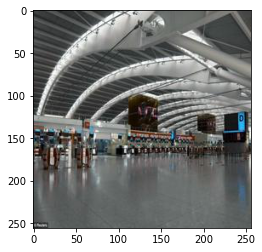

In [17]:
img = np.array(y_data[11], dtype=np.float32)
plt.imshow(img.astype(np.uint8))

2022-12-07 17:10:32.568153: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8500
2022-12-07 17:10:33.527479: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-07 17:10:33.711609: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


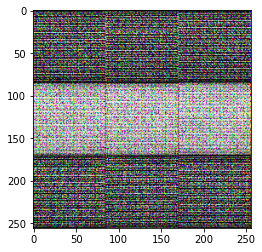

In [9]:
img = np.reshape(img, (1, 3, 256, 256))
img = (img / 128) - 1
generated_image = generator(img, training= True)
np.amax(generated_image)
generated_image = np.reshape(generated_image, (256, 256, 3))
plt.imshow(generated_image)

In [7]:
def discriminator():
    model = tf.keras.Sequential()
    model.add(Conv2D(64, 3,strides = (2, 2),padding = 'same', kernel_initializer = "he_normal", data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    

    model.add(layers.Conv2D(128, 4, strides = (2, 2), padding='same', data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    
    
    model.add(layers.Conv2D(256, 2, strides = (2, 2), padding='same', data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    

    model.add(layers.Conv2D(512, 2, strides = (1, 1), padding='same', data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    
    
    model.add(layers.Conv2D(1, 3, strides = (1, 1), padding='same', data_format= "channels_first"))
    model.add(layers.LeakyReLU(0.2))
    
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    model.build((None, 3, 256, 256))

    return model

In [15]:
discriminator = discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 128, 128)      1792      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 128, 128)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 64, 64)       131200    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128, 64, 64)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 32, 32)       131328    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256, 32, 32)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 512, 32, 32)      

In [12]:
decision = discriminator(np.reshape(generated_image, (1, 3, 256, 256)))
print (decision)

tf.Tensor([[-0.12538931]], shape=(1, 1), dtype=float32)


In [8]:
mse = tf.keras.losses.MeanSquaredError()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True,)
L1 = tf.keras.losses.MeanAbsoluteError()

In [54]:
def discriminator_loss(real_output, fake_output):
    real_loss = mse(tf.ones_like(real_output.astype(float)), real_output.astype(float))
    fake_loss = mse(tf.zeros_like(fake_output.astype(float)), fake_output.astype(float))
    total_loss = real_loss + fake_loss
    return total_loss
  
def generator_loss(real_output, fake_output):
    return L1(real_output.astype(float), fake_output.astype(float))

In [10]:
def get_adv_weight(adv_weight, epoch):
    if isinstance(adv_weight, list):
        if epoch < 10:
            return adv_weight[0]
        elif epoch < 30:
            return adv_weight[1]
        elif epoch < 60:
            return adv_weight[2]
        else:
            return adv_weight[3]
    else: # just one number
        return adv_weight

In [11]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate= 3e-4, beta_1= 0.5, beta_2= 0.999)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate= 3e-4, beta_1= 0.5, beta_2= 0.999)

In [16]:
checkpoint_dir = '/content/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [17]:
EPOCHS = 200
batch_size = 32
adv_weight = [0.001, 0.005, 0.015, 0.040]

In [18]:
temp = []
for j in range(100):
    temp.append(np.reshape((x_data[random.randint(0, 7000)]), (3, 256, 256)) / 255)
    if((j+1)%25 == 0):
        print("=", end="")
seed = tf.convert_to_tensor(temp, dtype = tf.float32)

====

In [37]:
@tf.function
def train_step(images, i):
    noise = train_dataset[i]

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(generated_images, images)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [19]:
class CEImageDataset(Dataset):

    def __init__(self, root):
        self.files = glob.glob(root)
        self.x_data = []
        self.y_data = []
        for i in self.files:
            img = cv2.imread(i)
            self.y_data.append(img)
            cropped_img = img[64:192, 64:192]
            temp_img = np.zeros((256,256,3),dtype = int)
            for i in range(3):
                temp_img[:,:,i] = np.pad(cropped_img[:,:,i],((64,64),(64,64)),'constant', constant_values = (100))
            self.x_data.append(temp_img)


    def __getitem__(self, index):
        return self.y_data[index], self.x_data[index]

    def __len__(self):
        return len(self.x_data)

In [30]:
class DataGenerator(tf.keras.utils.Sequence):
    """
        class to be fed into model.fit_generator method of tf.keras model
        uses a pytorch dataloader object to create a new generator object that can be used by tf.keras
        dataloader in pytorch must be used to load image data
        transforms on the input image data can be done with pytorch, model fitting still with tf.keras
        ...
        Attributes
        ----------
        gen : torch.utils.data.dataloader.DataLoader
            pytorch dataloader object; should be able to load image data for pytorch model
        ncl : int
            number of classes of input data; equal to number of outputs of model
    """
    def __init__(self, gen, ncl):
        """
            Parameters
            ----------
            gen : torch.utils.data.dataloader.DataLoader
                pytorch dataloader object; should be able to load image data for pytorch model
            ncl : int
                number of classes of input data; equal to number of outputs of model
        """
        self.gen = gen
        self.iter = iter(gen)

    def __getitem__(self, _):
        """
            function used by model.fit_generator to get next input image batch
            Variables
            ---------
            ims : np.ndarray
                image inputs; tensor of (batch_size, height, width, channels); input of model
            lbs : np.ndarray
                labels; tensor of (batch_size, number_of_classes); correct outputs for model
        """
        # catch when no items left in iterator
        try:
            ims, lbs = next(self.iter)  # generation of data handled by pytorch dataloader
        # catch when no items left in iterator
        except StopIteration:
            self.iter = iter(self.gen)  # reinstanciate iteator of data
            ims, lbs = next(self.iter)  # generation of data handled by pytorch dataloader
        # swap dimensions of image data to match tf.keras dimension ordering
        ims = np.swapaxes(ims.numpy(), 1, 3)
        # convert labels to one hot representation
        lbs = np.swapaxes(lbs.numpy(), 1, 3)
        return ims, lbs

    def __len__(self):
        """
            function that returns the number of batches in one epoch
        """
        return len(self.gen)

In [21]:
train_data = CEImageDataset(img_dir)


In [31]:
train_loader = DataGenerator(DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=1), len(x_data))

In [39]:
data_loader = {'train': train_loader}

In [32]:
imgt, test = train_loader[1]

In [34]:
imgt[0].shape

(3, 256, 256)

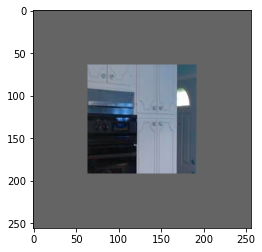

In [38]:
img = np.array(np.swapaxes(test[0], 0, 2), dtype=np.float32)
plt.imshow(img.astype(np.uint8))

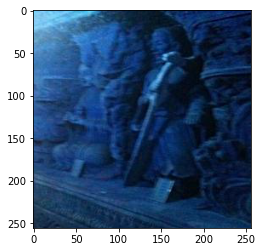

In [37]:
img = np.array(imgt, dtype=np.float32)
plt.imshow(img.astype(np.uint8))

In [43]:
from IPython.display import clear_output
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        count = 0

        for idx, (images, output) in enumerate(data_loader['train']):
            valid = tf.ones(shape= images[0].shape)
            fake = tf.fill(dims= images[0].shape, value= 0)

            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(images, training=True)

                real_output = discriminator(images, training=True)
                fake_output = discriminator(generated_images, training=True)

                pxl_loss = generator_loss(generated_images, images)
                adv_loss = discriminator_loss(fake_output, valid)

                cur_adv_weight = get_adv_weight(adv_weight, epoch)
                gen_loss = (1 - cur_adv_weight) * pxl_loss + cur_adv_weight * adv_loss

                disc_loss = 0.5 * discriminator_loss(images, fake_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # Produce images for the GIF as you go
        clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [41]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(10, 10))

    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(np.reshape(predictions[i] * 255, (256, 256, 3)).astype(np.uint8))
        plt.axis('off')

    plt.savefig('/content/Outputs/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()
train(train_data, EPOCHS)

In [41]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [42]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('/content/Outputs/image_at_epoch_{:04d}.png'.format(epoch_no))

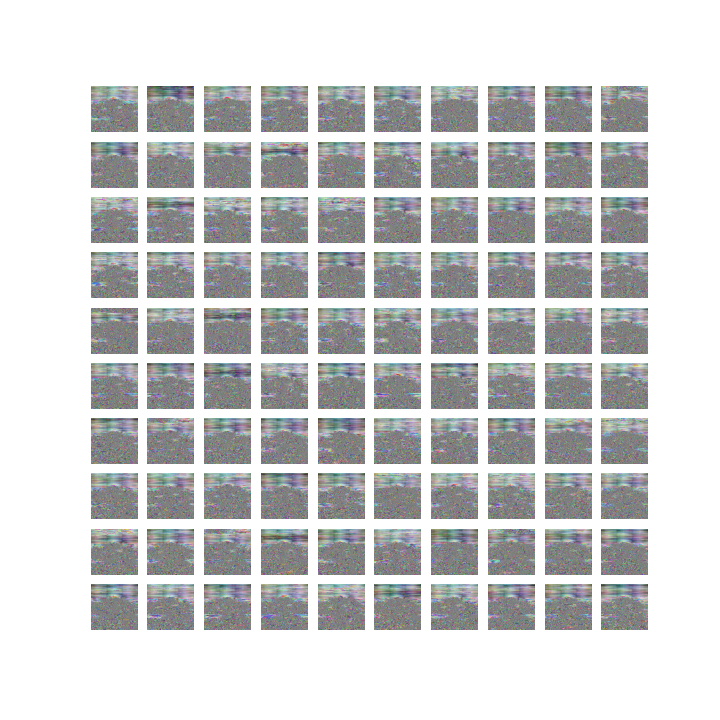

In [43]:
display_image(EPOCHS)

In [51]:
import glob
import imageio
anim_file = '/content/dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('/content/Outputs/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [5]:
import tensorflow_docs.vis.embed as embed
embed.embed_file('/content/dcgan.gif')

In [46]:
!zip -r "/content/outputs.zip" "/content/Outputs"

  adding: content/Outputs/ (stored 0%)
  adding: content/Outputs/image_at_epoch_0190.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0318.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0047.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0249.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0438.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0039.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0178.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0055.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0393.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0179.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0495.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0218.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0175.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0123.png (deflated 0%)
  adding: content/Outputs/image_at_epoch_0374.png (deflated 0%)
 

In [47]:
# !zip -r "/content/cp.zip" "/content/training_checkpoints"

  adding: content/training_checkpoints/ (stored 0%)
  adding: content/training_checkpoints/ckpt-2.data-00000-of-00001 (deflated 10%)
  adding: content/training_checkpoints/ckpt-9.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-29.data-00000-of-00001 (deflated 11%)
  adding: content/training_checkpoints/ckpt-21.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-24.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-14.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-2.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-12.data-00000-of-00001 (deflated 11%)
  adding: content/training_checkpoints/ckpt-17.data-00000-of-00001 (deflated 11%)
  adding: content/training_checkpoints/ckpt-1.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-16.index (deflated 78%)
  adding: content/training_checkpoints/ckpt-26.data-00000-of-00001 (deflated 11%)
  adding: content/training_checkpoints/ckpt-17.index (deflated 78%

In [48]:
# from google.colab import files
# files.download('/content/outputs.zip') 
# files.download('/content/cp.zip') 
# files.download('/content/dcgan.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>